In [184]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [185]:
# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Jen_H\Downloads\project\movies.csv')

In [186]:
# Peaking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [189]:
# Percent missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing.round(5)))

name - 0.0%
rating - 0.01004%
genre - 0.0%
year - 0.0%
released - 0.00026%
score - 0.00039%
votes - 0.00039%
director - 0.0%
writer - 0.00039%
star - 0.00013%
country - 0.00039%
budget - 0.28312%
gross - 0.02465%
company - 0.00222%
runtime - 0.00052%


In [190]:
# Data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [191]:
pd.set_option('display.max_rows', 1000)

In [203]:
# Improving format by removing unecessary decimals
df['budget'] = df['budget'].astype('float64')

df['gross'] = df['gross'].astype('float64')

df['votes'] = df['votes'].astype('Int64')

In [194]:
#There is incongruity between the year column and the year listed in the released column. 
#Creating new column for the correct year according to the released column.
df['released_year'] = df['released'].astype('string')

In [195]:
dateList = []
for i in df['released_year']:
    if pd.isna(i):
        dateList.append(None)
        continue
    iList = i.split()
    for char in iList:
        if char.isnumeric():
            dateList.append(char)
    releaseYear = numList[0]
df['released_year'] = dateList

In [196]:
df.sort_values(by=['gross'], inplace=True, ascending=False)

In [197]:
# Distinct companies
df['company'].drop_duplicates().sort_values(ascending=True)

4345        "DIA" Productions GmbH & Co. KG
7525    "Weathering With You" Film Partners
3024                        .406 Production
3748                     1+2 Seisaku Iinkai
5813                        10 West Studios
                       ...                 
4007                               i5 Films
6412               iDeal Partners Film Fund
5664                            micro_scope
7129                                thefyzz
7657                                    NaN
Name: company, Length: 2386, dtype: object

In [198]:
# Creating a null free dataframe for calculations while avoiding dropping data that may be pertinant for later.
df_nonull = df.dropna(axis=0, how="any")

In [200]:
print(df)

                                            name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   
...                                          ...    ...     ...   ...   
7663                                More to Life    NaN   Drama  2020   
7664                                 Dream Round    NaN  Comedy  2020   
7665                               Saving Mbango    NaN   Drama  2020   
7666                                It's Just Us    NaN   Drama  2020   
7667                                   Tee em el    NaN  Horror  2020   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1

In [201]:
print(df_nonull)

                                            name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score    votes             directo

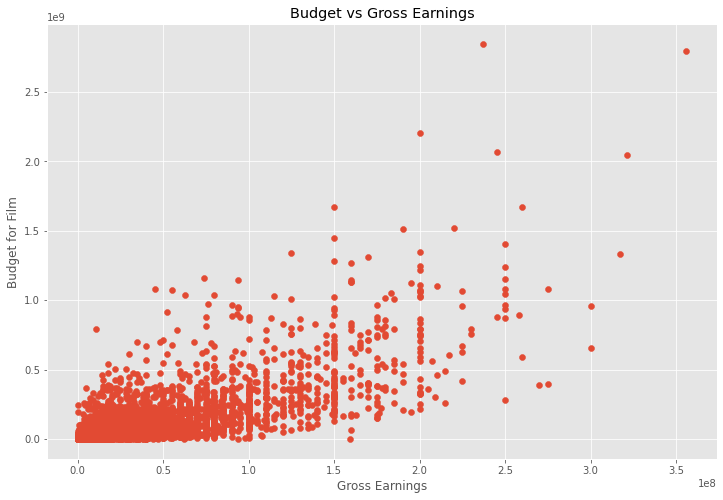

In [199]:
# Correlation between factors and gross revenue
plt.scatter(x=df_nonull['budget'], y=df_nonull['gross'])
plt.title('Budget vs Gross Earnings')
plt.ylabel('Budget for Film')
plt.xlabel('Gross Earnings')
plt.show()

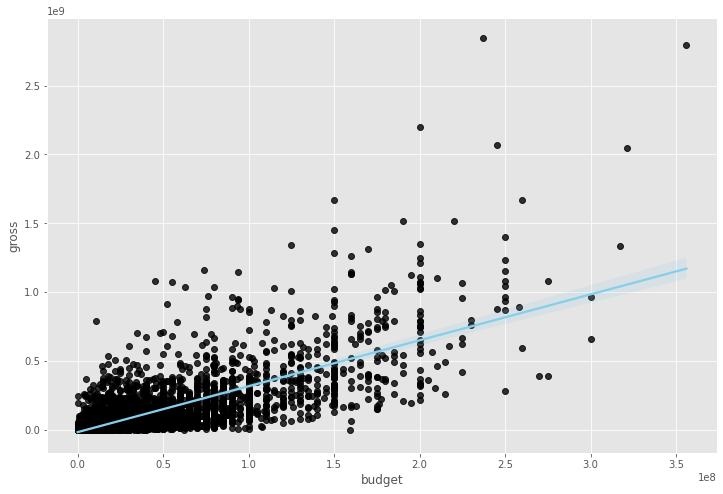

In [208]:
sns.regplot(x='budget', y='gross', data=df, dropna = True, scatter_kws={"color":"black"}, line_kws={'color':'skyblue'})
plt.show()

In [210]:
df.corr(method='pearson')
# Note: High positive correlation between budget and gross

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


Text(87.0, 0.5, 'Movie Features')

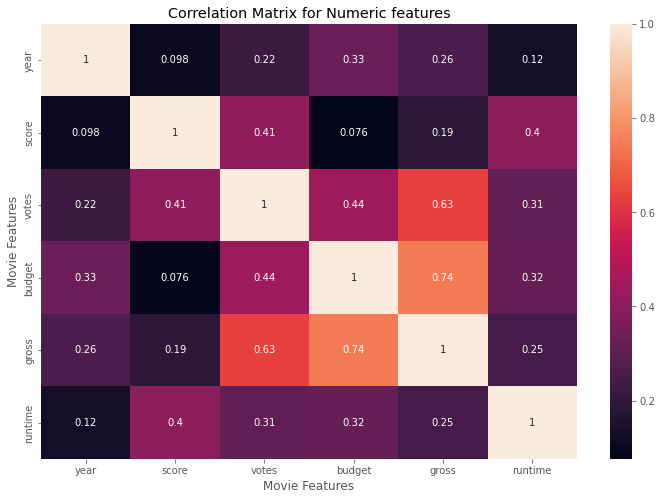

In [214]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


In [215]:
# Looking at correlations with nonnumeric columns
df_numerals = df
for col_name in df_numerals.columns:
    if(df_numerals[col_name].dtype == 'object'):
        df_numerals[col_name] = df_numerals[col_name].astype('category')
        df_numerals[col_name] = df_numerals[col_name].cat.codes

df_numerals

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18,1500,2289,2421,55,7000.0,NaN,-1,90.0,40
7664,1678,-1,4,2020,1107,4.7,36,774,2614,1886,55,NaN,NaN,539,90.0,40
7665,4717,-1,6,2020,193,5.7,29,2061,2683,2040,55,58750.0,NaN,941,NaN,40
7666,2843,-1,6,2020,2817,NaN,<NA>,1184,1824,450,55,15000.0,NaN,-1,120.0,40


Text(86.09375, 0.5, 'Movie Features')

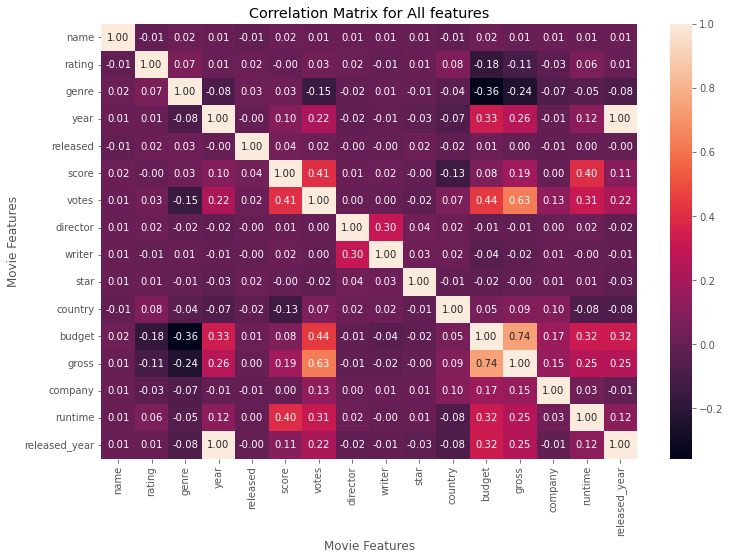

In [219]:
correlation_matrix = df_numerals.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True, fmt='.2f')
plt.title('Correlation Matrix for All features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [220]:
correlation_mat = df_numerals.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name           name             1.000000
               rating          -0.008069
               genre            0.016355
               year             0.011453
               released        -0.011311
               score            0.017097
               votes            0.013088
               director         0.009079
               writer           0.009081
               star             0.006472
               country         -0.010737
               budget           0.023970
               gross            0.005533
               company          0.009211
               runtime          0.010392
               released_year    0.010225
rating         name            -0.008069
               rating           1.000000
               genre            0.072423
               year             0.008779
               released         0.016613
               score           -0.001314
               votes            0.033225
               director         0.019483
               w

In [221]:
corr_pairs.sort_values(inplace = True)

In [228]:
high_corr = corr_pairs[(corr_pairs)>0.5]
# Removing correlations to self
high_corr = high_corr[(high_corr)<1.0]
high_corr

votes          gross            0.630757
gross          votes            0.630757
               budget           0.740395
budget         gross            0.740395
released_year  year             0.996397
year           released_year    0.996397
dtype: float64